# Density Analysis Inside the Pore

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import re,glob,os
from scipy import integrate
from numpy import pi as π
import dgutils
from pimcscripts import pimchelp
from collections import defaultdict
import linecache

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

pimc_bin_path = os.environ['HOME'] + '/.conda/envs/pimc/bin'
gp = os.environ['HOME'] + '/local/bin/parallel'

# Notebook display options
%config InlineBackend.figure_format = 'svg'

# plot style
plot_style = {'aps':'../include/aps.mplstyle', 'notebook':'../include/notebook.mplstyle'}
plt.style.reload_library()
plt.style.use(plot_style['notebook'])

figsize = plt.rcParams['figure.figsize']

π = np.pi
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

#colors = dgutils.colors.get_linear_colors('Spectral',10)


### Some definitions related to the location of data files

In [27]:
def lab(_ΔR):
    return f'ΔR = {_ΔR:3.1f} Å'

def base_dir(_ΔR,cylinder=True):
    base = f'../../../dR_eq_{_ΔR:3.1f}/OUTPUT/MERGED'
    if cylinder:
        base += '/CYLINDER'
    return base

reduce_par = 'T = 2.00'
ΔR = [2.0,3.0,4.0]
L = 100.0
R = 12.0

## Merge & Reduce
We are interested in the `particle position` estimator which is cumulative

In [3]:
merge = False

if merge:
    for cΔR in ΔR:
        print(f'Processing ΔR = {cΔR}')
        dirName = base_dir(cΔR,cylinder=False)
        ! rm -rf $dirName

In [4]:
%%time
if merge:
    dirNames = ' '.join([f'dR_eq_{cΔR:3.1f}' for cΔR in ΔR])
    merge_command = f"parallel {pimc_bin_path}/merge.py ../{{}}/OUTPUT/ ::: {dirNames}"
    stream = os.popen(merge_command)
    output = stream.read()
    print(output)

CPU times: user 1 µs, sys: 1e+03 ns, total: 2 µs
Wall time: 5.48 µs


## Load the position density file and convert to compressed .npy

### We also extract the header/discretization from the file

In [42]:
convert_position = False
match_number = re.compile('-?\ *[0-9]+\.?[0-9]*(?:[Ee]\ *[-+?]\ *[0-9]+)?')

ρ = {}
num_grid_sep = {}
δ = {}

for cΔR in ΔR:
    if convert_position:
        position_file = glob.glob(f'{base_dir(cΔR,cylinder=False)}/gce-position-*.dat')[0]
        est_info = linecache.getline(position_file, 2)

        # get the discretization info
        nums = [x for x in re.findall(match_number, est_info)]
        _δ = np.array([float(num) for num in nums[:3]])
        _num_grid_sep = int(nums[-1])

        # load the density and reshape
        _ρ = np.loadtxt(position_file).reshape([_num_grid_sep]*3)

        # save as a compressed .npz file
        np.savez_compressed(f'../data/gce-position-dR_eq_{cΔR:3.1f}', δ=_δ, ρ=_ρ, num_grid_sep=_num_grid_sep)

    else:
        ρ_data = np.load(f'../data/gce-position-dR_eq_{cΔR:3.1f}.npz')
        ρ[lab(cΔR)] = ρ_data['ρ']
        δ[lab(cΔR)] = ρ_data['δ']
        num_grid_sep[lab(cΔR)] = int(ρ_data['num_grid_sep'])

## Plot a few slices

In [43]:
cΔR = 4.0
δ = δ[lab(cΔR)]
num_grid_sep = num_grid_sep[lab(cΔR)]
ρ = ρ[lab(cΔR)]

In [44]:
w = 3
z_cut = np.linspace(-w,w,13)
z_slices = 
for _z in z_cut:
    print(_z)
    z_slices.append(np.where(zvals>_z)[0][0])

SyntaxError: invalid syntax (617939678.py, line 3)

In [45]:
zvals = np.linspace(-L/2,L/2-δ[-1],num_grid_sep)

In [46]:
np.where(zvals>_z)[0][0]

136

In [47]:
δ[-1]

0.3984064

In [48]:
z_cut = np.linspace(-4,4,11)
z_slices = []
for _z in z_cut:
    print(_z)
    z_slices.append(np.where(zvals>_z)[0][0])
    
print(z_slices)

-4.0
-3.2
-2.4
-1.5999999999999996
-0.7999999999999998
0.0
0.8000000000000007
1.6000000000000005
2.4000000000000004
3.2
4.0
[116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136]


findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

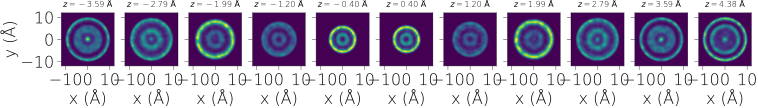

In [49]:
fig,ax = plt.subplots(nrows=1,ncols=11,sharex=True,sharey=True, figsize=(12,2))

#z_slices = [116,21,22,23,24,25,26,27,28,29,50]
for i,cz in enumerate(z_slices):
    ax[i].imshow(ρ[:,:,cz],extent=[-R,R,-R,R], vmin=0, vmax=0.1)
    ax[i].set_title(f'$z = {cz*δ[-1]-L/2 + δ[-1]/2:.2f}$ Å', fontsize=8)

ax[0].set_ylabel('y (Å)')
for cax in ax:
    cax.set_xlabel('x (Å)')

/tmp/ipykernel_96306/1701317317.py:14: RuntimeWarning: invalid value encountered in sqrt
  y_t = np.sqrt(dR**2-x_t**2)


Text(0, 0.5, 'y (Å)')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

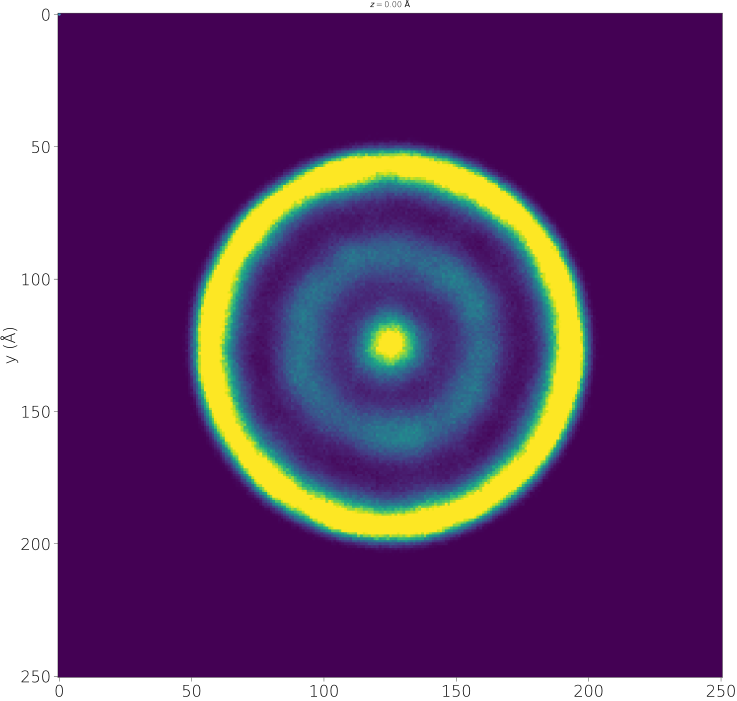

In [39]:
fig,ax = plt.subplots(nrows=1,ncols=1,sharex=True,sharey=True, figsize=(12,12))

dR = np.sqrt(δ[0]**2 + δ[1]**2)

z_slices = [125]
start = 21
finish = 30
#extent = [start*δ[0] - R, finish*δ[0]-R,start*δ[0] - R, finish*δ[0]-R]
for i,cz in enumerate(z_slices):
    ax.imshow(ρ[:,:,cz], vmin=0, vmax=0.1)
    ax.set_title(f'$z = {cz*δ[-1]-L/2 + δ[-1]/2:.2f}$ Å', fontsize=8)
    
x_t = np.linspace(-2,2,10000)
y_t = np.sqrt(dR**2-x_t**2)
plt.plot(x_t,y_t)
plt.plot(x_t,-y_t)

ax.set_ylabel('y (Å)')
#for cax in ax:
#    cax.set_xlabel('x (Å)')

### Slice through the middle

Text(0.5, 1.0, 'x = 0.0 Å')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

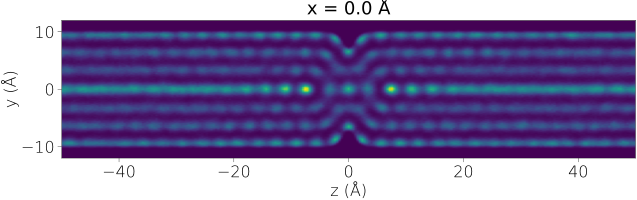

In [40]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(10,4))
ax.imshow(ρ[:,125,:], extent=[-L/2,L/2,-R,R])
ax.set_xlabel('z (Å)')
ax.set_ylabel('y (Å)')
ax.set_title('x = 0.0 Å')

## Integrate along the pore

In [12]:
ρxy = (np.sum(ρ,axis=2)*δ[-1])

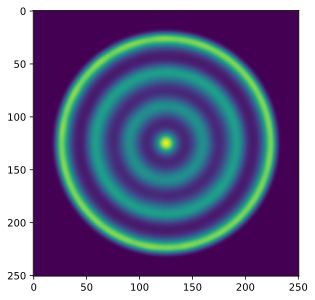

In [13]:
plt.imshow(ρxy)

### Check we have the correct number of particles

In [14]:
np.sum(ρ)*δ[0]*δ[1]*δ[2]

941.9663992422956

In [15]:
%run $pimc_bin_path/pimcave.py ../dR_eq_4.0/OUTPUT/MERGED/gce-estimator*.dat

# PIMCID b4a0693f-d95e-45f4-9ae7-6c484dbd4906
# Number Samples 111083
K                20865.68229	     1.50338	 0.01
V               -35290.29282	     1.41184	 0.00
V_ext           -14966.98147	     0.38703	 0.00
V_int           -20209.07155	     1.10079	 0.01
E               -14424.61053	     1.05238	 0.01
E_mu             -7650.83883	     1.02152	 0.01
K/N                 22.17688	     0.00127	 0.01
V/N                -37.50927	     0.00066	 0.00
E/N                -15.33238	     0.00108	 0.01
N                  940.80163	     0.02159	 0.00
N^2             885160.71768	    40.66321	 0.00
density              0.02080	     0.00000	 0.00
diagonal             0.58740	     0.00028	 0.05


<Figure size 640x480 with 0 Axes>

## Compute the radial density

In [50]:
R = 12.0
dR = np.sqrt(δ[0]**2 + δ[1]**2)
N_R = int(np.floor(R/dR))+1
print(dR,N_R)
norm = np.ones(N_R)
rvals = np.arange(0,R-0*dR,dR)

for n in range(N_R):
    norm[n] /= np.pi*(2*n+1)*dR*dR
    
ρ_rad = np.zeros([num_grid_sep,N_R])
for iz in range(num_grid_sep):
    for i in range(num_grid_sep):
        y = -R + δ[1]*i + δ[1]/2
        for j in range(num_grid_sep):
            x = -R + δ[0]*j + + δ[0]/2
            _r = np.sqrt(x**2 + y**2)
            k = int(_r/dR)
            
            
            if k==0:
                pass
                #print(f'z = {-L/2 + iz*δ[-1] + δ[-1]/2,x,y,i,j}')
            if k < N_R:                
                ρ_rad[iz,k] += ρ[i,j,iz]*δ[0]*δ[1]
ρ_rad *= norm

0.1352236077266163 89


In [37]:
num_grid_sep

251

In [38]:
for i in range(num_grid_sep):
    print(f'{i}, z = {i*δ[-1] -L/2 + δ[-1]/2}')

0, z = -49.8007968
1, z = -49.4023904
2, z = -49.003984
3, z = -48.605577600000004
4, z = -48.2071712
5, z = -47.8087648
6, z = -47.4103584
7, z = -47.011952
8, z = -46.6135456
9, z = -46.2151392
10, z = -45.8167328
11, z = -45.4183264
12, z = -45.01992
13, z = -44.6215136
14, z = -44.2231072
15, z = -43.8247008
16, z = -43.4262944
17, z = -43.027888000000004
18, z = -42.6294816
19, z = -42.2310752
20, z = -41.8326688
21, z = -41.4342624
22, z = -41.035856
23, z = -40.6374496
24, z = -40.2390432
25, z = -39.8406368
26, z = -39.4422304
27, z = -39.043824
28, z = -38.6454176
29, z = -38.2470112
30, z = -37.848604800000004
31, z = -37.450198400000005
32, z = -37.051792
33, z = -36.6533856
34, z = -36.2549792
35, z = -35.8565728
36, z = -35.4581664
37, z = -35.05976
38, z = -34.6613536
39, z = -34.2629472
40, z = -33.8645408
41, z = -33.4661344
42, z = -33.067728
43, z = -32.6693216
44, z = -32.270915200000005
45, z = -31.872508800000006
46, z = -31.4741024
47, z = -31.075696
48, z = -30.6

In [51]:
z_slices

[116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136]

In [25]:
z_slices

[116, 118, 120, 121, 123, 125, 127, 129, 131, 132, 134, 136]

In [ ]:
np.arange()

In [37]:
z_slices = np.linspace(110,140,50,dtype=int)

In [38]:
z_slices

array([110, 110, 111, 111, 112, 113, 113, 114, 114, 115, 116, 116, 117,
       117, 118, 119, 119, 120, 121, 121, 122, 122, 123, 124, 124, 125,
       125, 126, 127, 127, 128, 128, 129, 130, 130, 131, 132, 132, 133,
       133, 134, 135, 135, 136, 136, 137, 138, 138, 139, 140])

In [40]:
colors = dgutils.colors.get_linear_colors('Spectral',len(z_slices))

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

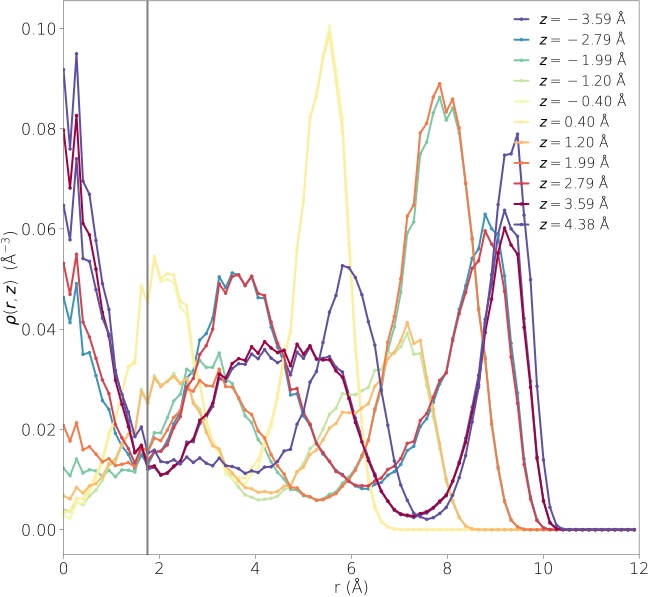

In [53]:
#z_slices = [0,21,22,23,24,25]
fig = plt.subplots(1,figsize=(10,10))
for i,cz in enumerate(z_slices):
    plt.plot(rvals,ρ_rad[cz]+i*0.0,'.-', label=f'$z = {cz*δ[-1]-L/2 + δ[-1]/2:.2f}$ Å')

plt.xlim(0,R)
plt.xlabel('r (Å)')
plt.ylabel(r'$\rho(r,z)\;\; (\rm \AA^{-3})$')
plt.axvline(x=1.75, color='grey')
plt.legend()

926.5836285476693

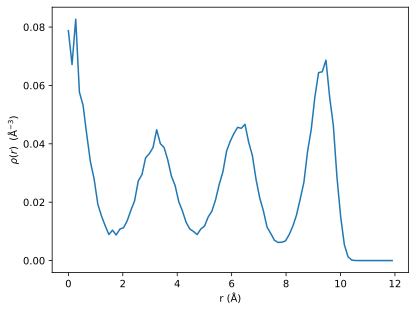

In [45]:
ρrad_ave = np.sum(ρ_rad, axis=0)*δ[-1]/L
plt.plot(rvals,ρrad_ave)
plt.xlabel('r (Å)')
plt.ylabel(r'$\rho(r)\;\; (\rm \AA^{-3})$')

integrate.simps(rvals*ρrad_ave,rvals)*2*π*L

### Check if the local z-resolved particle density makes sense

In [46]:
r_idx = np.where(rvals < 1.75)[0][-1]
print(r_idx)

12


In [50]:
r_idx_mod = (r_idx+1)*np.ones(num_grid_sep, dtype='int')
r_idx_mod[125] = 2

In [51]:
N_rad = np.zeros(num_grid_sep)
for i in range(num_grid_sep):
    N_rad[i] = integrate.simps(rvals[:r_idx_mod[i]]*ρ_rad[i,:r_idx_mod[i]],rvals[:r_idx_mod[i]])*2*π*δ[-1]*L
    

Text(0, 0.5, '$\\rho_{1D}$  (1/Å)')

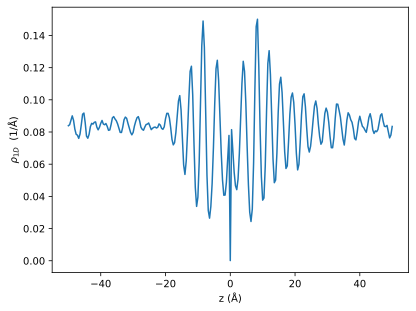

In [52]:
z = np.linspace(-L/2,L/2,num_grid_sep)
fig,ax = plt.subplots()
ax.plot(z,N_rad/L)
ax.set_xlabel('z (Å)')
ax.set_ylabel(r'$\rho_{1D}$  (1/Å)')

### Compare with what we measure in QMC with the hard cutoff

In [27]:
reduce_params = {'reduce':'T', 'L':100, 'μ':-7.2}

ρ,V = {},{}
estimator = defaultdict(dict)
for cΔR in ΔR:

    V[lab(cΔR)] = pimchelp.PIMCResults(pimchelp.get_reduce_name(**reduce_params, base_dir=base_dir(cΔR),estimator='linepotential'))
    ρ[lab(cΔR)] = pimchelp.PIMCResults(pimchelp.get_reduce_name(**reduce_params, base_dir=base_dir(cΔR),estimator='linedensity'))
    
    est_name = pimchelp.get_reduce_name(**reduce_params, base_dir=base_dir(cΔR),estimator='estimator')
    estimator[lab(cΔR)] = pimchelp.PIMCResults(est_name)

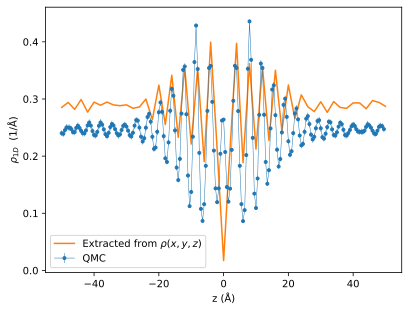

In [38]:
fig,ax = plt.subplots()
for cΔR in [4.0]:
    _x,_ρ,_Δρ = ρ[lab(cΔR)].epdata(reduce_par)
    ax.errorbar(_x-L/2,_ρ,yerr=_Δρ, lw=0.5, marker='.', label='QMC')

#ax.plot(x,0.1*np.cos(2*π*0.242252879*x)+0.25, alpha=0.3)
ax.plot(z,N_rad/L, label=r'Extracted from $\rho(x,y,z)$')

ax.set_xlabel('z (Å)')
ax.set_ylabel(r'$\rho_{1D}$  (1/Å)')
ax.legend()
#plt.axvline(x=50, color='grey', ls=':', lw=0.5)